## Federal University of Bahia (UFBA)

### Control Systems Projects

### Challenge 01 - Internal Model Principle

### Professor: Tito Maia

### Student: Gabriel Correia

---


## Importanto Bibliotecas

In [1]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 9.4 MB/s eta 0:00:00


In [2]:
# Importando as bibliotecas para trabalhar como se fosse no MATLAB

import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Tenta importar a biblioteca de controle e a instala se não estiver presente
try:
    import control as ct
except ImportError:
    print("Biblioteca 'control' não encontrada. Tentando instalar...")
    import subprocess
    import sys
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "control"])
        import control as ct
        print("Biblioteca 'control' instalada com sucesso. Rodando o script...")
    except Exception as e:
        print(f"Falha ao instalar a biblioteca 'control'. Erro: {e}")
        print("Por favor, instale a biblioteca manualmente executando: pip install control")
        sys.exit()

## Simulação Questão 1

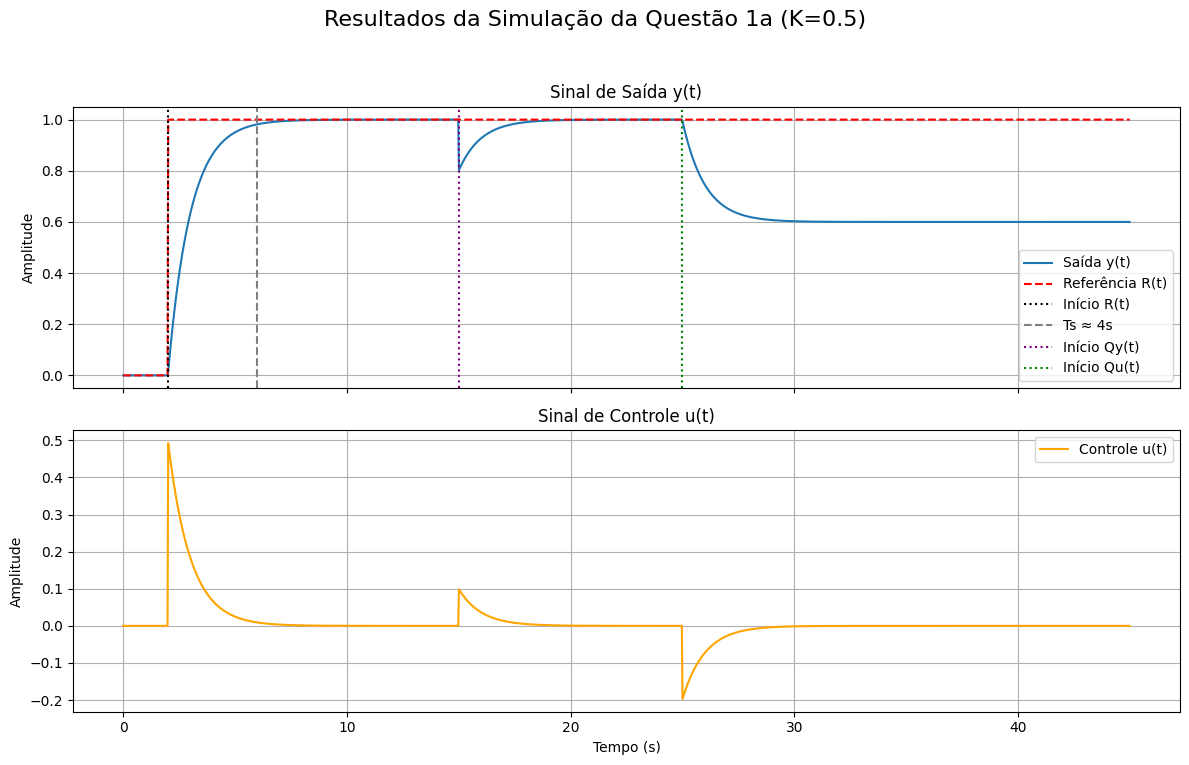


--- Avaliação do Comportamento do Sistema (Questão 1a) ---
1. Resposta à Referência (t=2s): A saída segue a referência e estabiliza em t≈6s, confirmando o tempo de acomodação de 4s.
2. Erro em Regime Permanente (Referência): Como a planta G(s)=2/s é Tipo 1, o erro para uma entrada degrau na referência é NULO. A saída converge para 1.
3. Rejeição à Perturbação na Saída Qy(t) (t=15s): O sistema rejeita completamente a perturbação em degrau na saída. A saída desvia-se, mas retorna a 1.
4. Rejeição à Perturbação na Entrada Qu(t) (t=25s): O sistema NÃO rejeita a perturbação em degrau na entrada, resultando em um erro permanente. A saída estabiliza em 0.6.


In [3]:
"""
Resolução e Simulação da Questão 1a do Desafio I
"""

# --- Passo 1: Definição dos Parâmetros e do Sistema ---
# O valor de K foi calculado matematicamente como 0.5
K = 0.5
s = ct.tf('s')

# Funções de Transferência conforme o enunciado da Questão 1
G = 2 / s      # Planta
C = K        # Controlador Proporcional
F = 1        # Filtro de Referência (ganho unitário)

# --- Passo 2: Definição das Funções de Transferência de Malha Fechada ---
# FTs para a SAÍDA Y(s)
L = C * G                # Ganho de malha L(s) = C(s)G(s)
S = 1 / (1 + L)          # Função de Sensibilidade: Y(s)/Qy(s)
T_ref = F * L / (1 + L)  # FT da Referência: Y(s)/R(s)
T_dist_u = G * S         # FT da Perturbação na Entrada: Y(s)/Qu(s)

# FTs para o SINAL DE CONTROLE U(s)
U_r = C * S * F          # U(s)/R(s)
U_qy = -C * S          # U(s)/Qy(s)
U_qu = S               # U(s)/Qu(s)

# --- Passo 3: Simulação no Domínio do Tempo ---
t = np.linspace(0, 45, 1500)
r_signal = (t >= 2).astype(float)
qy_signal = -0.2 * (t >= 15).astype(float)
qu_signal = -0.2 * (t >= 25).astype(float)

# Simula a resposta a cada entrada e soma os resultados (Princípio da Superposição)
# CORREÇÃO: Usando ct.forced_response em vez de ct.lsim - achei melhor assim porque o outro gerou muito problema (mas não entendi)
y_total = (ct.forced_response(T_ref, T=t, U=r_signal)[1] +
           ct.forced_response(S, T=t, U=qy_signal)[1] +
           ct.forced_response(T_dist_u, T=t, U=qu_signal)[1])

u_total = (ct.forced_response(U_r, T=t, U=r_signal)[1] +
           ct.forced_response(U_qy, T=t, U=qy_signal)[1] +
           ct.forced_response(U_qu, T=t, U=qu_signal)[1])

# --- Passo 4: Geração dos Diagramas e Avaliação ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.suptitle('Resultados da Simulação da Questão 1a (K=0.5)', fontsize=16)

# Gráfico da Saída y(t)
ax1.plot(t, y_total, label='Saída y(t)')
ax1.plot(t, r_signal, 'r--', label='Referência R(t)')
ax1.set_title('Sinal de Saída y(t)')
ax1.set_ylabel('Amplitude')
ax1.grid(True)
ax1.axvline(2, color='k', linestyle=':', label='Início R(t)')
ax1.axvline(6, color='gray', linestyle='--', label='Ts ≈ 4s')
ax1.axvline(15, color='purple', linestyle=':', label='Início Qy(t)')
ax1.axvline(25, color='green', linestyle=':', label='Início Qu(t)')
ax1.legend()

# Gráfico do Controle u(t)
ax2.plot(t, u_total, 'orange', label='Controle u(t)')
ax2.set_title('Sinal de Controle u(t)')
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Amplitude')
ax2.legend()
ax2.grid(True)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Avaliação dos Resultados (item ii) ---
print("\n--- Avaliação do Comportamento do Sistema (Questão 1a) ---")
print("1. Resposta à Referência (t=2s): A saída segue a referência e estabiliza em t≈6s, confirmando o tempo de acomodação de 4s.")
print("2. Erro em Regime Permanente (Referência): Como a planta G(s)=2/s é Tipo 1, o erro para uma entrada degrau na referência é NULO. A saída converge para 1.")
print("3. Rejeição à Perturbação na Saída Qy(t) (t=15s): O sistema rejeita completamente a perturbação em degrau na saída. A saída desvia-se, mas retorna a 1.")
print("4. Rejeição à Perturbação na Entrada Qu(t) (t=25s): O sistema NÃO rejeita a perturbação em degrau na entrada, resultando em um erro permanente. A saída estabiliza em 0.6.")


## Simulação Questão 2


--- Resolvendo Questão 2 ---
0 states have been removed from the model
3 states have been removed from the model
1 states have been removed from the model
2 states have been removed from the model
1 states have been removed from the model
2 states have been removed from the model


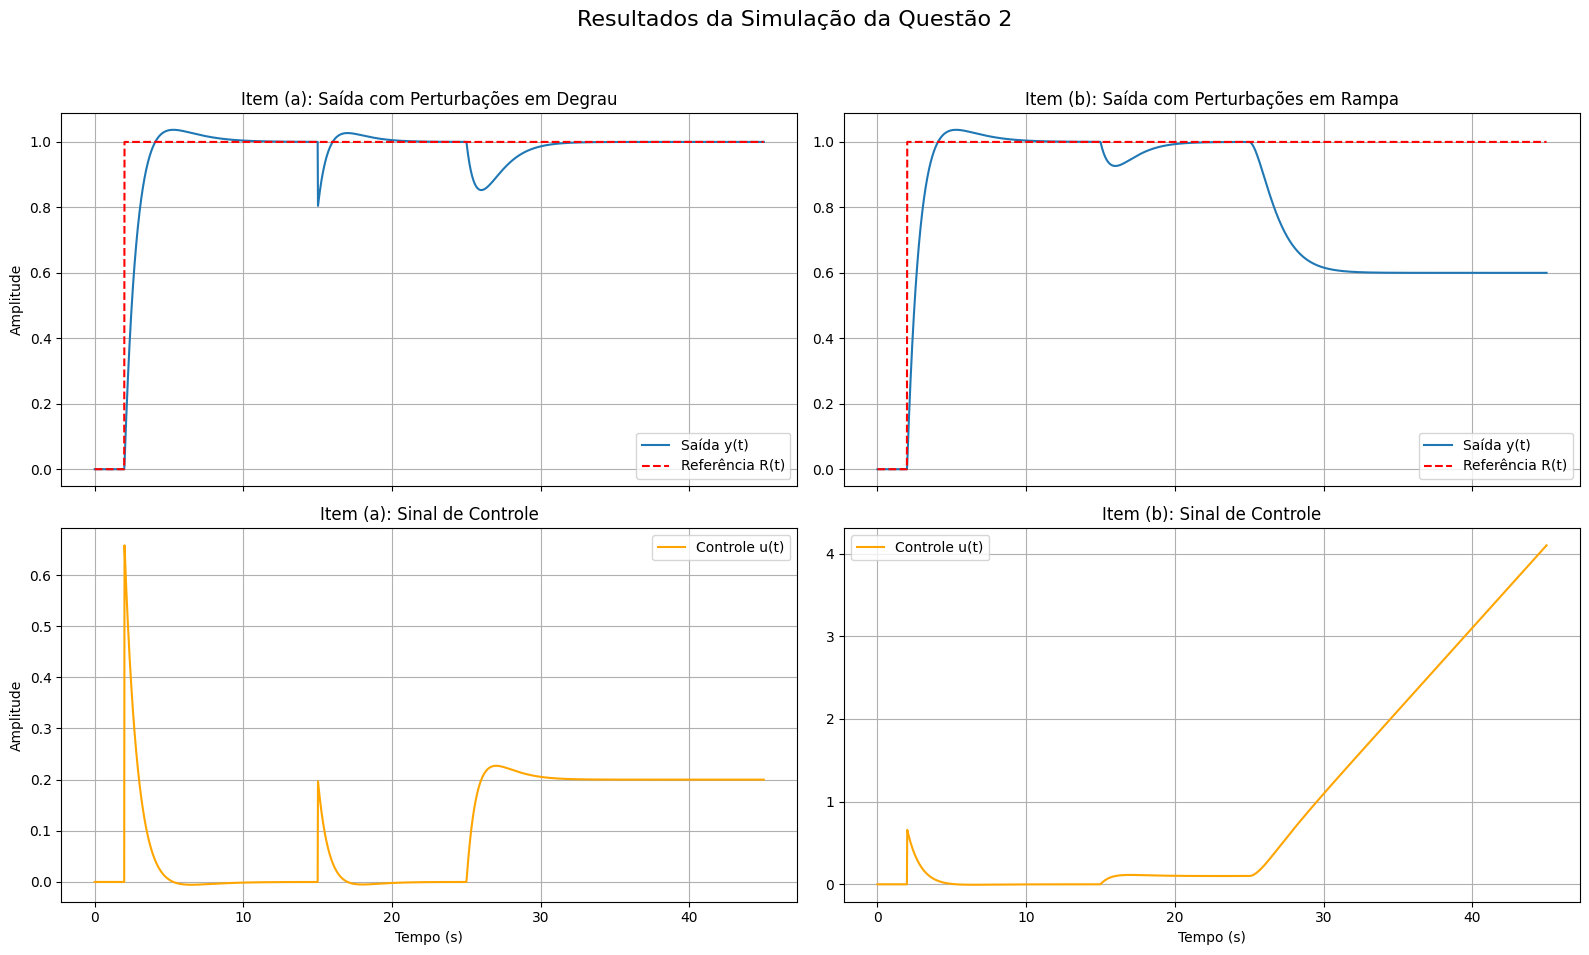

In [4]:
"""
Resolução e Simulação da Questão 2 (a e b) do Desafio I
"""


def resolver_questao_2():
    print("\n--- Resolvendo Questão 2 ---")

    # --- Passo 1: Definição dos Parâmetros e do Sistema ---
    # Parâmetros deduzidos matematicamente
    K = 1
    z = 0.5
    tau_n = 1
    tau_d = 1.5
    s = ct.tf('s')

    # Funções de Transferência
    G = 2 / s
    C = K * (s + z) / s
    F = (tau_n * s + 1) / (tau_d * s + 1)

    # FTs de Malha Fechada
    L = ct.minreal(C * G)
    S = 1 / (1 + L)
    T_ref = ct.minreal(F * L / (1 + L))
    T_dist_u = ct.minreal(G * S)

    # FTs para o Sinal de Controle U(s)
    U_r = ct.minreal(C * S * F)
    U_qy = ct.minreal(-C * S)
    U_qu = ct.minreal(-L * S) # Note que U/Qu = -T (sensibilidade complementar)

    # --- Passo 2: Simulação ---
    t = np.linspace(0, 45, 2000)

    # --- Simulação para o item (a) com perturbações em DEGRAU ---
    r_a = (t >= 2).astype(float)
    qy_a = -0.2 * (t >= 15).astype(float)
    qu_a = -0.2 * (t >= 25).astype(float)

    y_a = (ct.forced_response(T_ref, T=t, U=r_a)[1] +
           ct.forced_response(S, T=t, U=qy_a)[1] +
           ct.forced_response(T_dist_u, T=t, U=qu_a)[1])

    u_a = (ct.forced_response(U_r, T=t, U=r_a)[1] +
           ct.forced_response(U_qy, T=t, U=qy_a)[1] +
           ct.forced_response(U_qu, T=t, U=qu_a)[1])

    # --- Simulação para o item (b) com perturbações em RAMPA ---
    r_b = r_a # A referência é a mesma
    qy_b = -0.2 * (t - 15) * (t >= 15)
    qu_b = -0.2 * (t - 25) * (t >= 25)

    y_b = (ct.forced_response(T_ref, T=t, U=r_b)[1] +
           ct.forced_response(S, T=t, U=qy_b)[1] +
           ct.forced_response(T_dist_u, T=t, U=qu_b)[1])

    u_b = (ct.forced_response(U_r, T=t, U=r_b)[1] +
           ct.forced_response(U_qy, T=t, U=qy_b)[1] +
           ct.forced_response(U_qu, T=t, U=qu_b)[1])

    # --- Passo 3: Geração dos Diagramas ---
    fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)
    fig.suptitle('Resultados da Simulação da Questão 2', fontsize=16)

    # Gráficos para o item (a)
    axes[0, 0].plot(t, y_a, label='Saída y(t)')
    axes[0, 0].plot(t, r_a, 'r--', label='Referência R(t)')
    axes[0, 0].set_title('Item (a): Saída com Perturbações em Degrau')
    axes[0, 0].set_ylabel('Amplitude')
    axes[0, 0].legend(); axes[0, 0].grid(True)

    axes[1, 0].plot(t, u_a, 'orange', label='Controle u(t)')
    axes[1, 0].set_title('Item (a): Sinal de Controle')
    axes[1, 0].set_xlabel('Tempo (s)'); axes[1, 0].set_ylabel('Amplitude')
    axes[1, 0].legend(); axes[1, 0].grid(True)

    # Gráficos para o item (b)
    axes[0, 1].plot(t, y_b, label='Saída y(t)')
    axes[0, 1].plot(t, r_b, 'r--', label='Referência R(t)')
    axes[0, 1].set_title('Item (b): Saída com Perturbações em Rampa')
    axes[0, 1].legend(); axes[0, 1].grid(True)

    axes[1, 1].plot(t, u_b, 'orange', label='Controle u(t)')
    axes[1, 1].set_title('Item (b): Sinal de Controle')
    axes[1, 1].set_xlabel('Tempo (s)')
    axes[1, 1].legend(); axes[1, 1].grid(True)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Execução Principal ---
if __name__ == '__main__':
    # Garante que a biblioteca de controle está instalada (só para evitar bugs)
    try:
        import control
    except ImportError:
        print("Instalando a biblioteca 'control'...")
        import subprocess, sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "control"])

    resolver_questao_2()


## Simulação Questão 3


--- Resolvendo Questão 3 ---
0 states have been removed from the model
2 states have been removed from the model
1 states have been removed from the model
1 states have been removed from the model
1 states have been removed from the model
2 states have been removed from the model


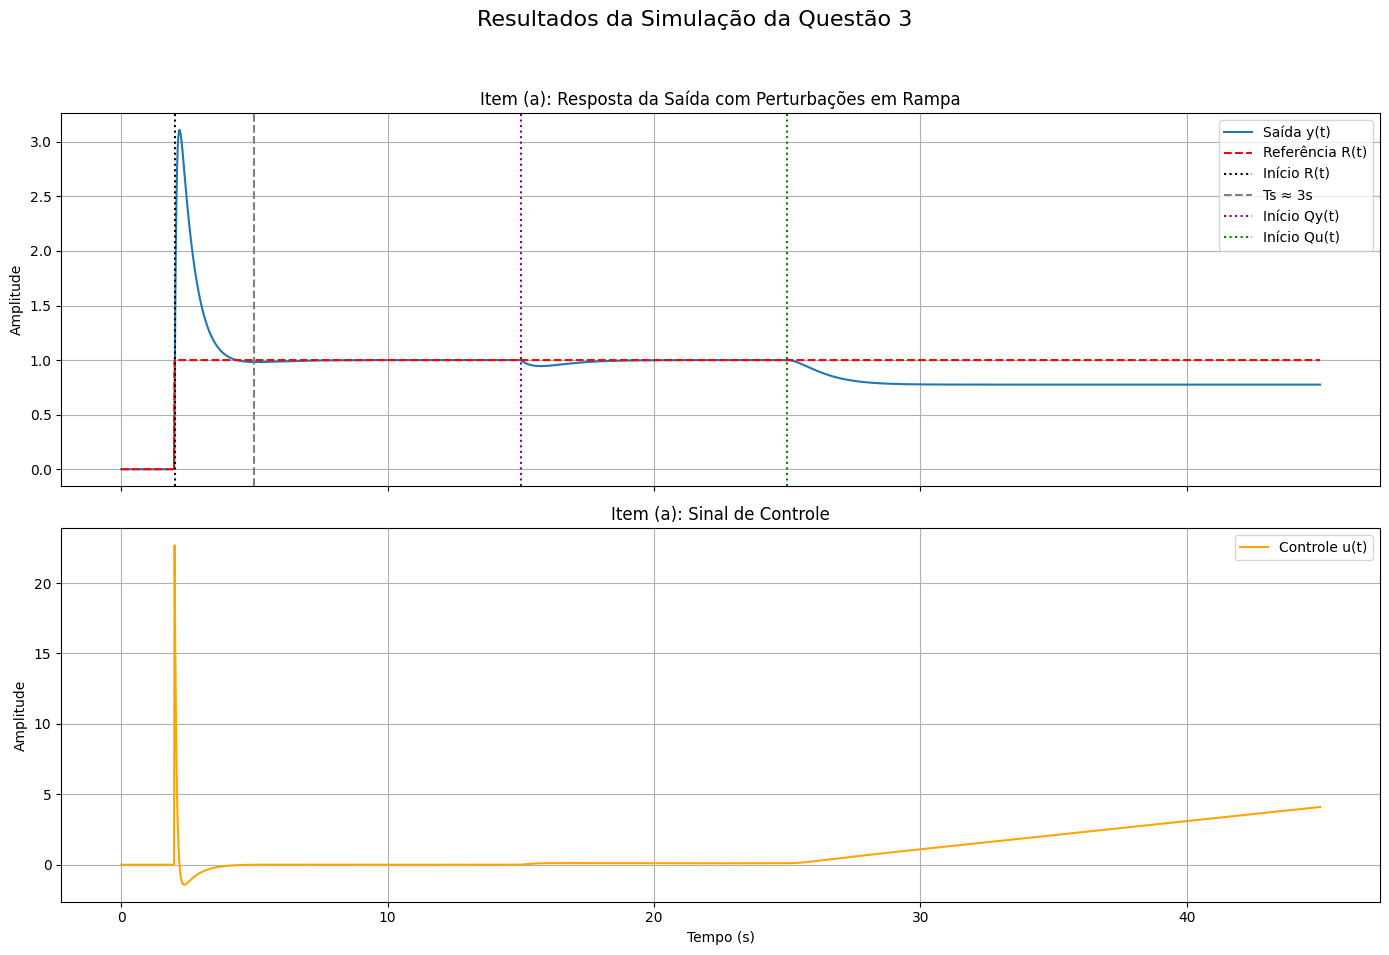

In [5]:
"""
Resolução e Simulação da Questão 3 do Desafio I
"""

def resolver_questao_3():
    print("\n--- Resolvendo Questão 3 ---")

    # --- Passo 1: Definição dos Parâmetros e do Sistema ---
    # Parâmetros deduzidos matematicamente
    K = 4/3
    z = 2/3
    tau_n = 1.5
    tau_d = 0.075
    s = ct.tf('s')

    # Funções de Transferência
    G = 2 / s
    C = K * (s + z) / s
    F = (tau_n * s + 1) / (tau_d * s + 1)

    # FTs de Malha Fechada
    L = ct.minreal(C * G)
    S = 1 / (1 + L)
    T_ref = ct.minreal(F * L / (1 + L))
    T_dist_u = ct.minreal(G * S)

    # FTs para o Sinal de Controle U(s)
    U_r = ct.minreal(C * S * F)
    U_qy = ct.minreal(-C * S)
    U_qu = ct.minreal(-L * S)

    # --- Passo 2: Simulação (Item a) ---
    t = np.linspace(0, 45, 2000)

    # Sinais de entrada (referência em degrau, perturbações em rampa)
    r_signal = (t >= 2).astype(float)
    qy_signal = -0.2 * (t - 15) * (t >= 15)
    qu_signal = -0.2 * (t - 25) * (t >= 25)

    # Simulação da Saída y(t)
    y_total = (ct.forced_response(T_ref, T=t, U=r_signal)[1] +
               ct.forced_response(S, T=t, U=qy_signal)[1] +
               ct.forced_response(T_dist_u, T=t, U=qu_signal)[1])

    # Simulação do Controle u(t)
    u_total = (ct.forced_response(U_r, T=t, U=r_signal)[1] +
               ct.forced_response(U_qy, T=t, U=qy_signal)[1] +
               ct.forced_response(U_qu, T=t, U=qu_signal)[1])

    # --- Passo 3: Geração dos Diagramas ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    fig.suptitle('Resultados da Simulação da Questão 3', fontsize=16)

    # Gráfico da Saída y(t)
    ax1.plot(t, y_total, label='Saída y(t)')
    ax1.plot(t, r_signal, 'r--', label='Referência R(t)')
    ax1.set_title('Item (a): Resposta da Saída com Perturbações em Rampa')
    ax1.set_ylabel('Amplitude')
    ax1.axvline(2, color='k', linestyle=':', label='Início R(t)')
    ax1.axvline(5, color='gray', linestyle='--', label='Ts ≈ 3s')
    ax1.axvline(15, color='purple', linestyle=':', label='Início Qy(t)')
    ax1.axvline(25, color='green', linestyle=':', label='Início Qu(t)')
    ax1.legend()
    ax1.grid(True)

    # Gráfico do Controle u(t)
    ax2.plot(t, u_total, 'orange', label='Controle u(t)')
    ax2.set_title('Item (a): Sinal de Controle')
    ax2.set_xlabel('Tempo (s)')
    ax2.set_ylabel('Amplitude')
    ax2.legend()
    ax2.grid(True)

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Execução Principal ---
if __name__ == '__main__':
    # Garante que a biblioteca de controle está instalada (só para evitar bugs)
    try:
        import control
    except ImportError:
        print("Instalando a biblioteca 'control'...")
        import subprocess, sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "control"])

    resolver_questao_3()


### **OBSERVAÇÃO:**

#### **O que ocorreu com a perturbação Qu(s) quando comparado ao caso anterior? Este resultado pode ser previsto sem a necessidade de simulação?**

Sim, este resultado pode ser previsto sem a necessidade de simulação, utilizando a teoria de erro em regime permanente e o conceito de "Tipo" do sistema.

No caso anterior (Questão 2), o sistema também era Tipo 2 (planta Tipo 1 e controlador PI Tipo 1), e foi submetido a uma perturbação em rampa na entrada da planta, Qu(s). O resultado, como previsto pela teoria, foi um erro em regime permanente constante. A saída se deslocou para um novo valor e ali permaneceu.

Nesta Questão 3, o sistema continua sendo Tipo 2. Portanto, ao ser submetido à mesma perturbação em rampa em Qu(s), o comportamento esperado é exatamente o mesmo: o sistema apresentará um erro em regime permanente constante.

A única diferença entre os dois casos é a magnitude desse erro. O valor do erro em regime permanente para esta configuração é inversamente proporcional ao ganho estático do controlador, especificamente ao produto K⋅z. Como os valores de K e z foram alterados no projeto da Questão 3 para atender a um tempo de acomodação diferente, o valor final para o qual a saída irá convergir também será diferente.

## Simulação Questão 4

0 states have been removed from the model
0 states have been removed from the model
2 states have been removed from the model
1 states have been removed from the model
1 states have been removed from the model
1 states have been removed from the model
2 states have been removed from the model
0 states have been removed from the model
0 states have been removed from the model
4 states have been removed from the model
1 states have been removed from the model
3 states have been removed from the model
3 states have been removed from the model
4 states have been removed from the model


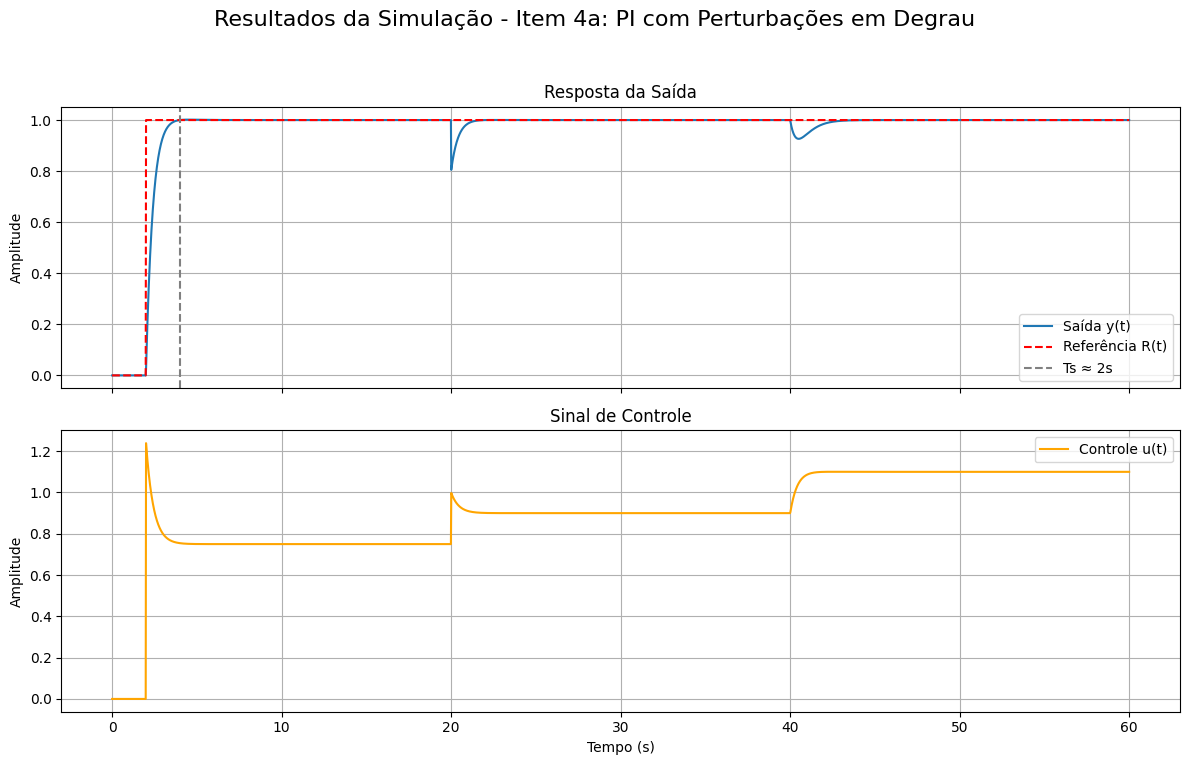

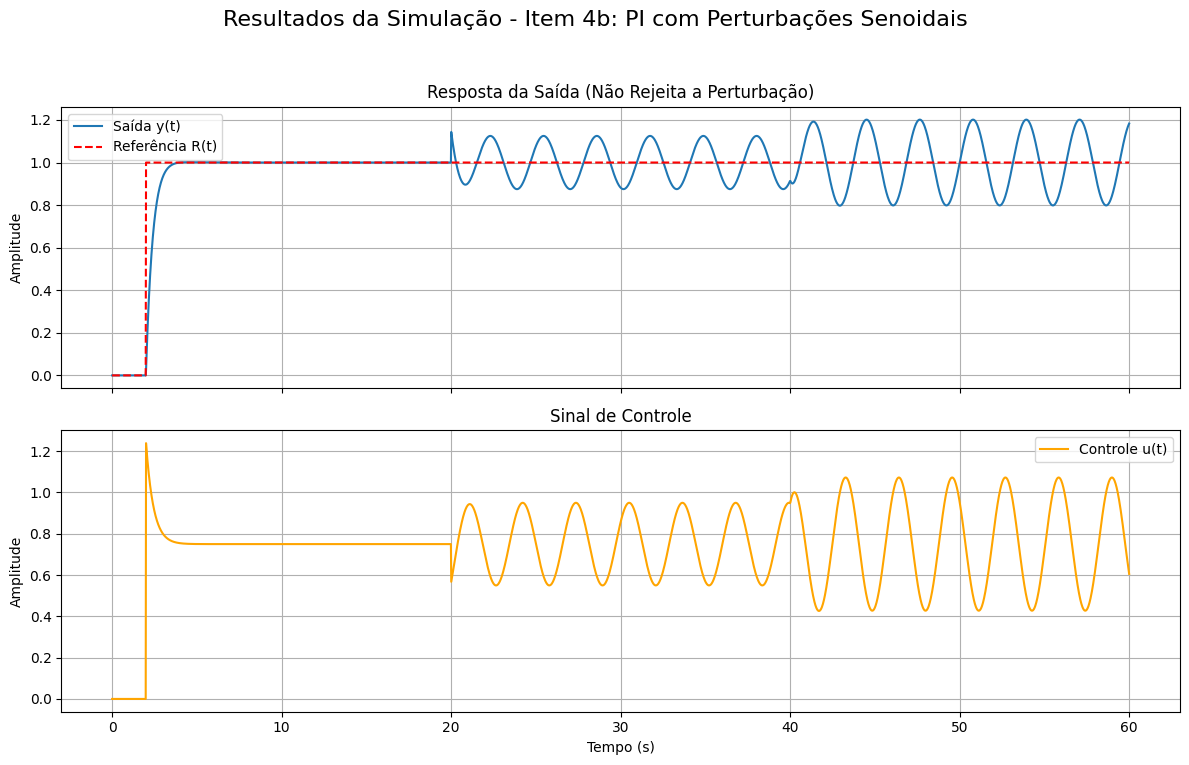

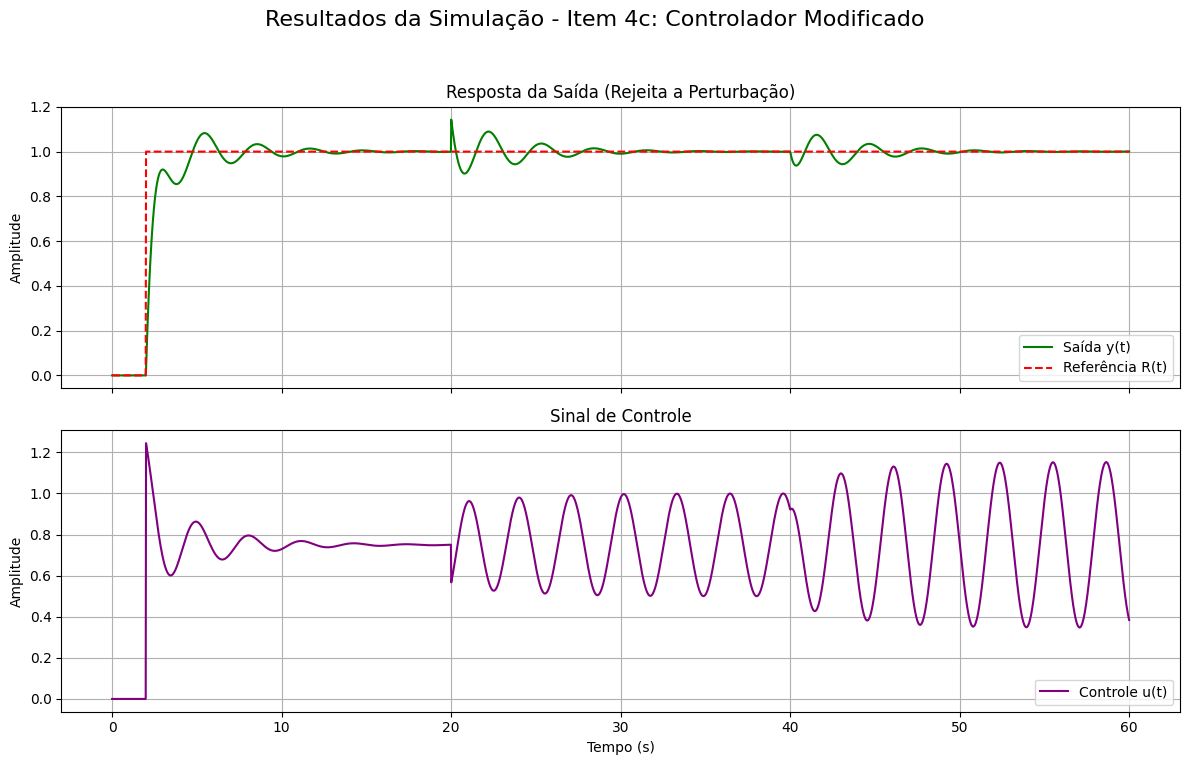

In [12]:
"""
Resolução e Simulação da Questão 4
Implementando as perturbações senoidais do enunciado.
"""

# --- Parâmetros e Definição do Sistema (Corretos) ---
K = 1.25
z = 1.6
s = ct.tf('s')

# Planta correta
G = 2 / (s + 1.5)

# Controlador PI
C_pi = K * (s + z) / s

# Controlador Modificado com filtro Notch
C_mod = C_pi * (s**2 + 0.5*s + 1.8**2) / (s**2 + 2**2)

# --- FTs para Saída Y(s) e Controle U(s) com Controlador PI ---
L_pi = ct.minreal(C_pi * G)
S_pi = ct.minreal(1 / (1 + L_pi))
T_ref_pi = ct.minreal(L_pi * S_pi)
T_dist_u_pi = ct.minreal(G * S_pi)
U_r_pi = ct.minreal(C_pi * S_pi)
U_qy_pi = ct.minreal(-C_pi * S_pi)
U_qu_pi = ct.minreal(-L_pi * S_pi)

# --- FTs para Saída Y(s) e Controle U(s) com Controlador Modificado ---
L_mod = ct.minreal(C_mod * G)
S_mod = ct.minreal(1 / (1 + L_mod))
T_ref_mod = ct.minreal(L_mod * S_mod)
T_dist_u_mod = ct.minreal(G * S_mod)
U_r_mod = ct.minreal(C_mod * S_mod)
U_qy_mod = ct.minreal(-C_mod * S_mod)
U_qu_mod = ct.minreal(-L_mod * S_mod)

# --- Simulação ---
t = np.linspace(0, 60, 3000)
r_signal = (t >= 2).astype(float)

# --- Simulação para o Item (a) ---
qy_a = -0.2 * (t >= 20).astype(float)
qu_a = -0.2 * (t >= 40).astype(float)
y_a = (ct.forced_response(T_ref_pi, T=t, U=r_signal)[1] + ct.forced_response(S_pi, T=t, U=qy_a)[1] + ct.forced_response(T_dist_u_pi, T=t, U=qu_a)[1])
u_a = (ct.forced_response(U_r_pi, T=t, U=r_signal)[1] + ct.forced_response(U_qy_pi, T=t, U=qy_a)[1] + ct.forced_response(U_qu_pi, T=t, U=qu_a)[1])

# --- Simulação para o Item (b) ---
# ***** CORREÇÃO DA IMPLEMENTAÇÃO DA SENOIDE *****
qy_b = 0.2 * np.sin(2 * t) * (t >= 20)
qu_b = 0.2 * np.sin(2 * t) * (t >= 40)
# ***********************************************
y_b = (ct.forced_response(T_ref_pi, T=t, U=r_signal)[1] + ct.forced_response(S_pi, T=t, U=qy_b)[1] + ct.forced_response(T_dist_u_pi, T=t, U=qu_b)[1])
u_b = (ct.forced_response(U_r_pi, T=t, U=r_signal)[1] + ct.forced_response(U_qy_pi, T=t, U=qy_b)[1] + ct.forced_response(U_qu_pi, T=t, U=qu_b)[1])

# --- Simulação para o Item (c) ---
# Usando as mesmas perturbações corrigidas
y_c = (ct.forced_response(T_ref_mod, T=t, U=r_signal)[1] + ct.forced_response(S_mod, T=t, U=qy_b)[1] + ct.forced_response(T_dist_u_mod, T=t, U=qu_b)[1])
u_c = (ct.forced_response(U_r_mod, T=t, U=r_signal)[1] + ct.forced_response(U_qy_mod, T=t, U=qy_b)[1] + ct.forced_response(U_qu_mod, T=t, U=qu_b)[1])

# --- Geração dos Gráficos ---

# Figura 1: Item (a)
fig1, (ax1a, ax2a) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig1.suptitle('Resultados da Simulação - Item 4a: PI com Perturbações em Degrau', fontsize=16)
ax1a.plot(t, y_a, label='Saída y(t)'); ax1a.plot(t, r_signal, 'r--', label='Referência R(t)'); ax1a.set_title('Resposta da Saída'); ax1a.set_ylabel('Amplitude'); ax1a.axvline(4, color='gray', linestyle='--', label='Ts ≈ 2s'); ax1a.legend(); ax1a.grid(True)
ax2a.plot(t, u_a, 'orange', label='Controle u(t)'); ax2a.set_title('Sinal de Controle'); ax2a.set_xlabel('Tempo (s)'); ax2a.set_ylabel('Amplitude'); ax2a.legend(); ax2a.grid(True)
fig1.tight_layout(rect=[0, 0.03, 1, 0.95])

# Figura 2: Item (b)
fig2, (ax1b, ax2b) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig2.suptitle('Resultados da Simulação - Item 4b: PI com Perturbações Senoidais', fontsize=16)
ax1b.plot(t, y_b, label='Saída y(t)'); ax1b.plot(t, r_signal, 'r--', label='Referência R(t)'); ax1b.set_title('Resposta da Saída (Não Rejeita a Perturbação)'); ax1b.set_ylabel('Amplitude'); ax1b.legend(); ax1b.grid(True)
ax2b.plot(t, u_b, 'orange', label='Controle u(t)'); ax2b.set_title('Sinal de Controle'); ax2b.set_xlabel('Tempo (s)'); ax2b.set_ylabel('Amplitude'); ax2b.legend(); ax2b.grid(True)
fig2.tight_layout(rect=[0, 0.03, 1, 0.95])

# Figura 3: Item (c)
fig3, (ax1c, ax2c) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig3.suptitle('Resultados da Simulação - Item 4c: Controlador Modificado', fontsize=16)
ax1c.plot(t, y_c, 'g', label='Saída y(t)'); ax1c.plot(t, r_signal, 'r--', label='Referência R(t)'); ax1c.set_title('Resposta da Saída (Rejeita a Perturbação)'); ax1c.set_ylabel('Amplitude'); ax1c.legend(); ax1c.grid(True)
ax2c.plot(t, u_c, 'purple', label='Controle u(t)'); ax2c.set_title('Sinal de Controle'); ax2c.set_xlabel('Tempo (s)'); ax2c.set_ylabel('Amplitude'); ax2c.legend(); ax2c.grid(True)
fig3.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()
